**Problem**- **Statement** : *Build an efficient Classification Model that should predict whether it Rains Tomorrow or not, using the dataset Rain in Australia.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Data and Importing Libraries**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
warnings.filterwarnings("ignore")
path="/content/drive/MyDrive/Project/weatherAUS.csv"
df = pd.read_csv(path)

#Dataset is now stored in a Pandas Dataframe

# **Exploring and Visualizing Data**

In [3]:
# Shape of the data frame
df.shape

(145460, 23)

*The data frame has 23 Attributes with 1,45,460 data points*

In [4]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# This gives statistics of our data like Maxvalue,Mean,Count..etc for every column
 
df.describe()     

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


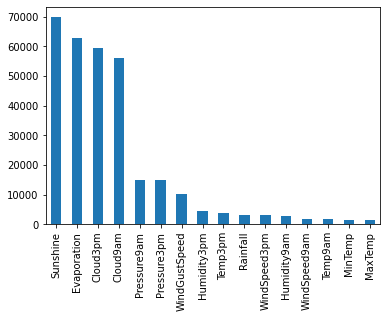

In [8]:
# gives the number of null values in each column
df.isna().sum()

# visualizing the Null values in Numerical Features:
df[numerical_feature].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

*Evaporation and Sunshine have most null values*

In [9]:
'''for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()'''

'for feature in continuous_feature:\n    data=df.copy()\n    sns.distplot(df[feature])\n    plt.xlabel(feature)\n    plt.ylabel("Count")\n    plt.title(feature)\n    plt.figure(figsize=(15,15))\n    plt.show()'

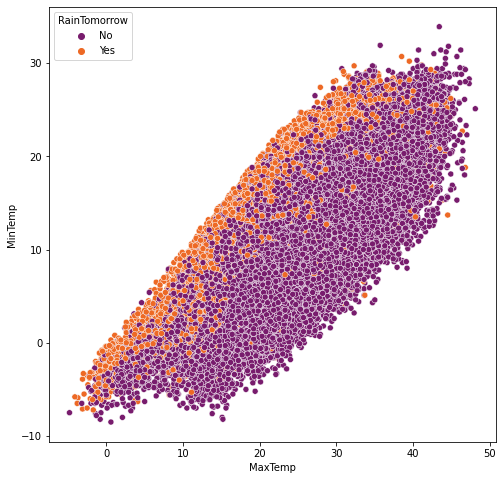

In [10]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

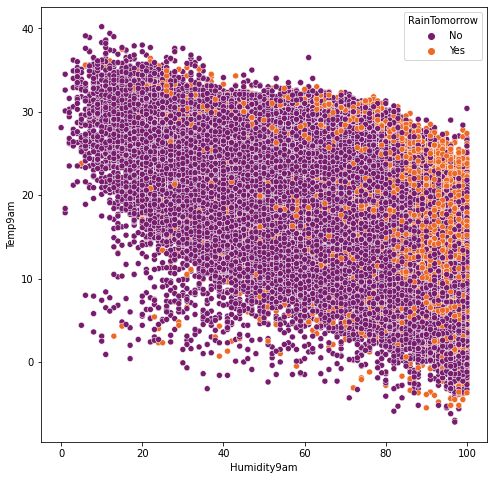

In [11]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

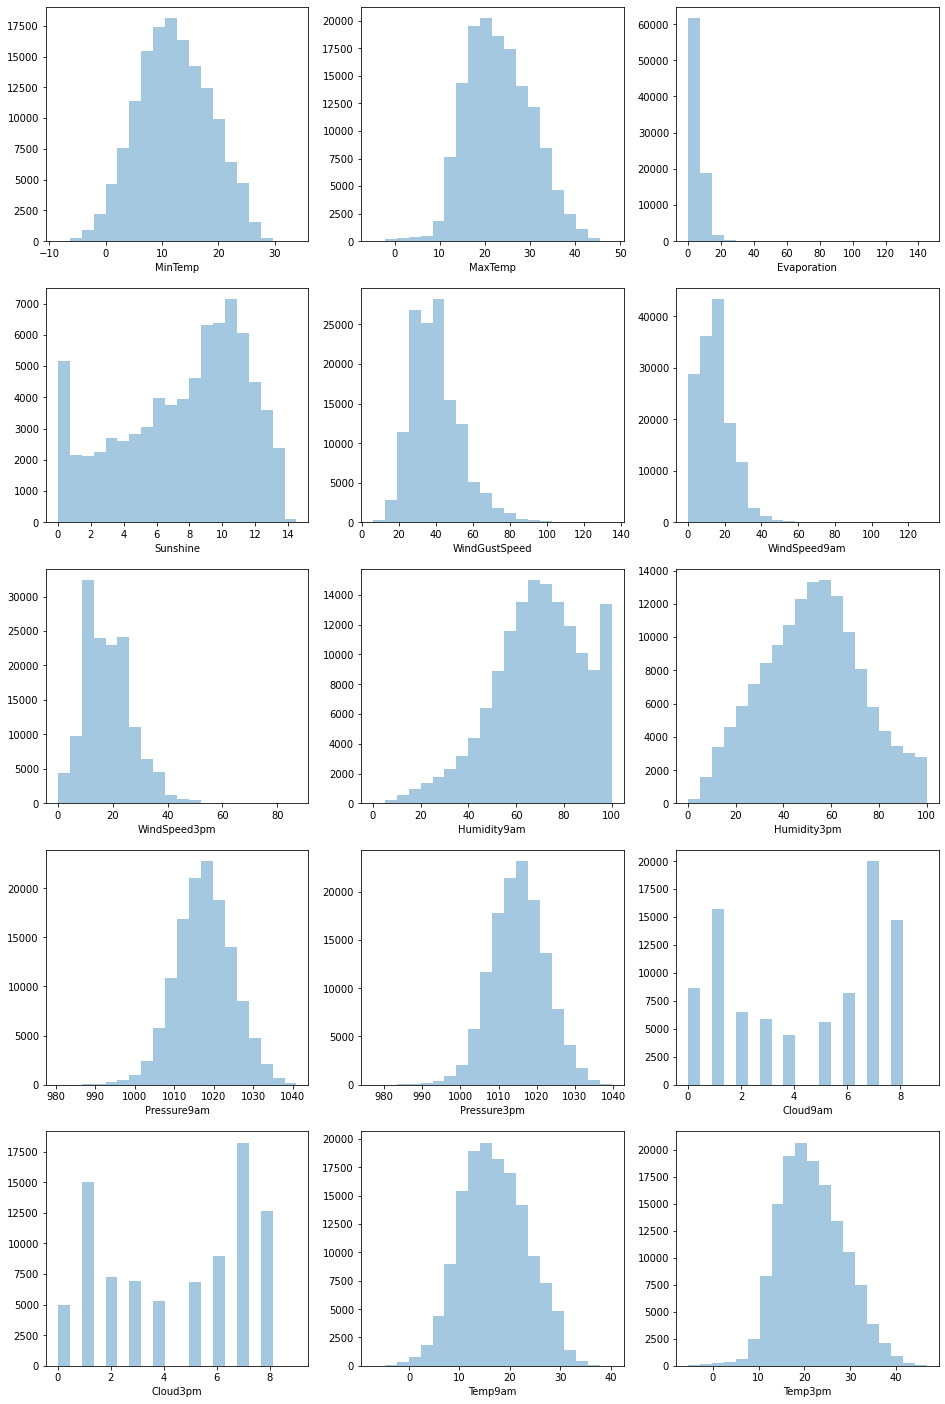

In [12]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);



*Most features are normally distributed *



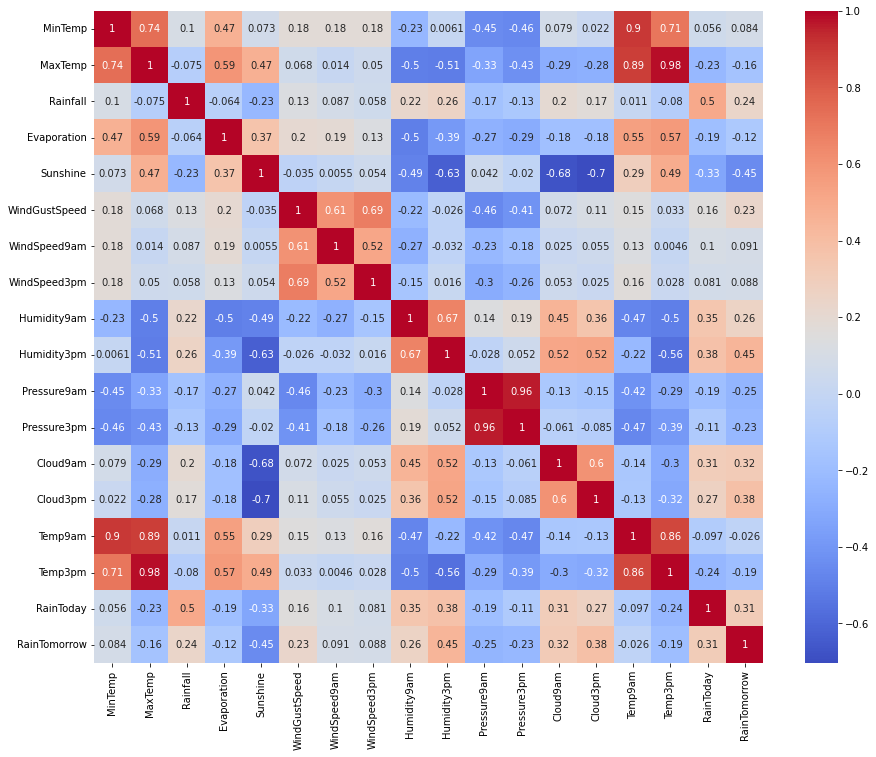

In [13]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)
sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));
#This gives a graphical representation of data using colors to visualize the value of the matrix.

# **Handling Outliers**

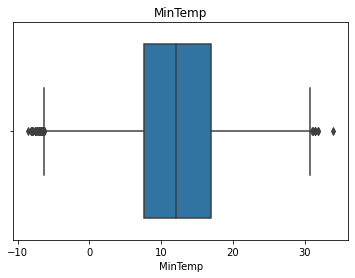

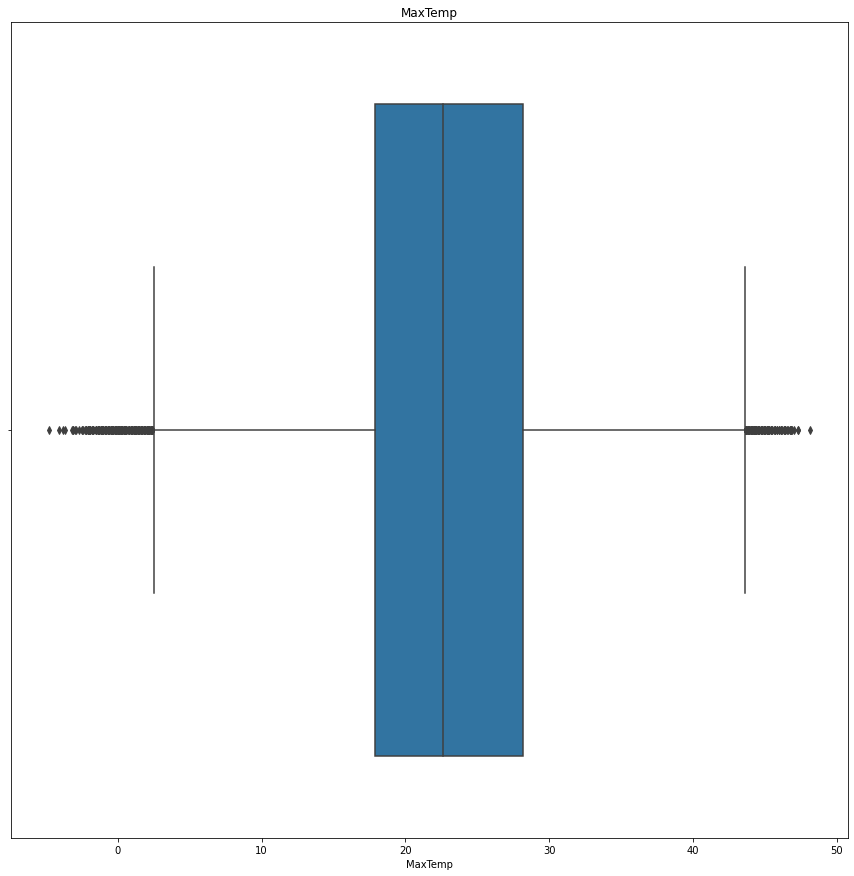

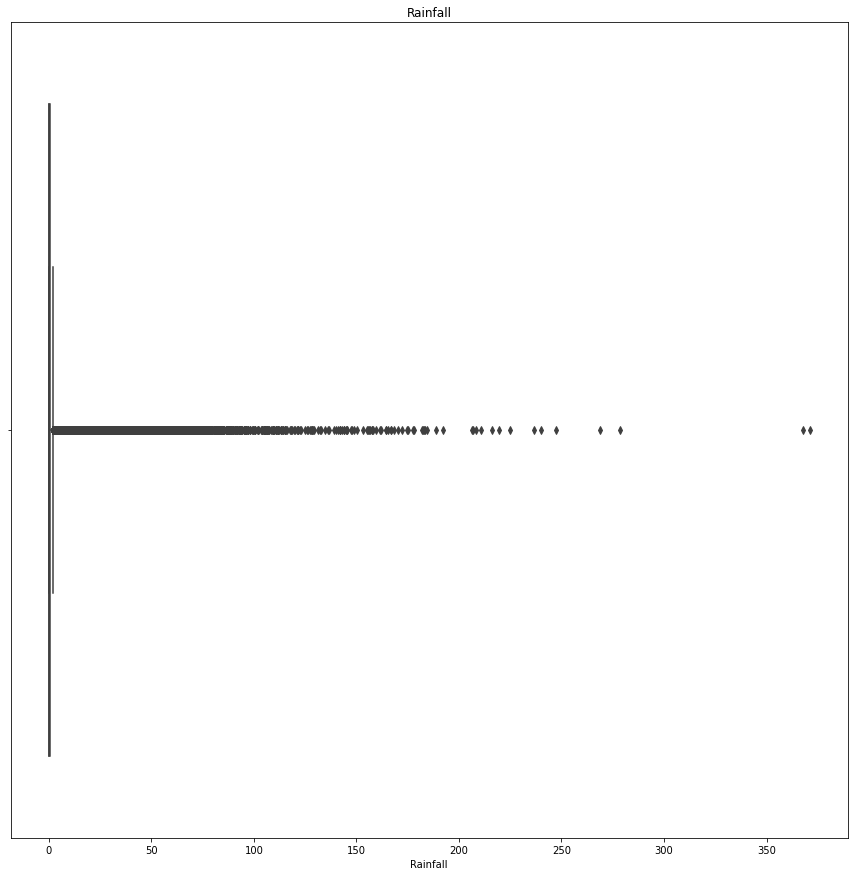

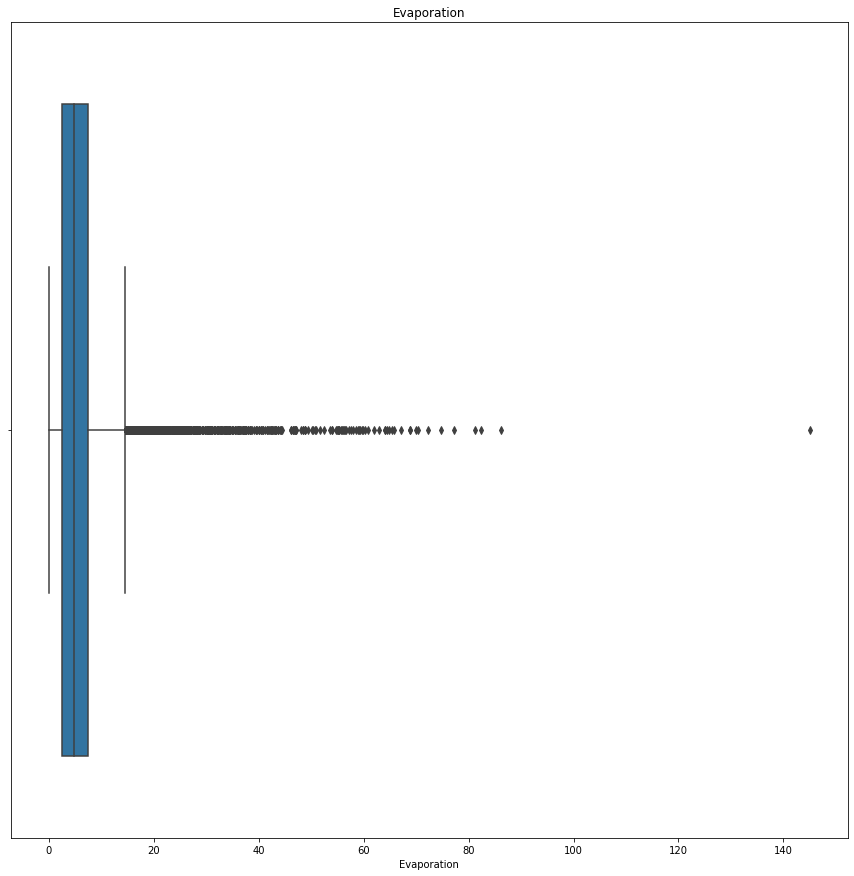

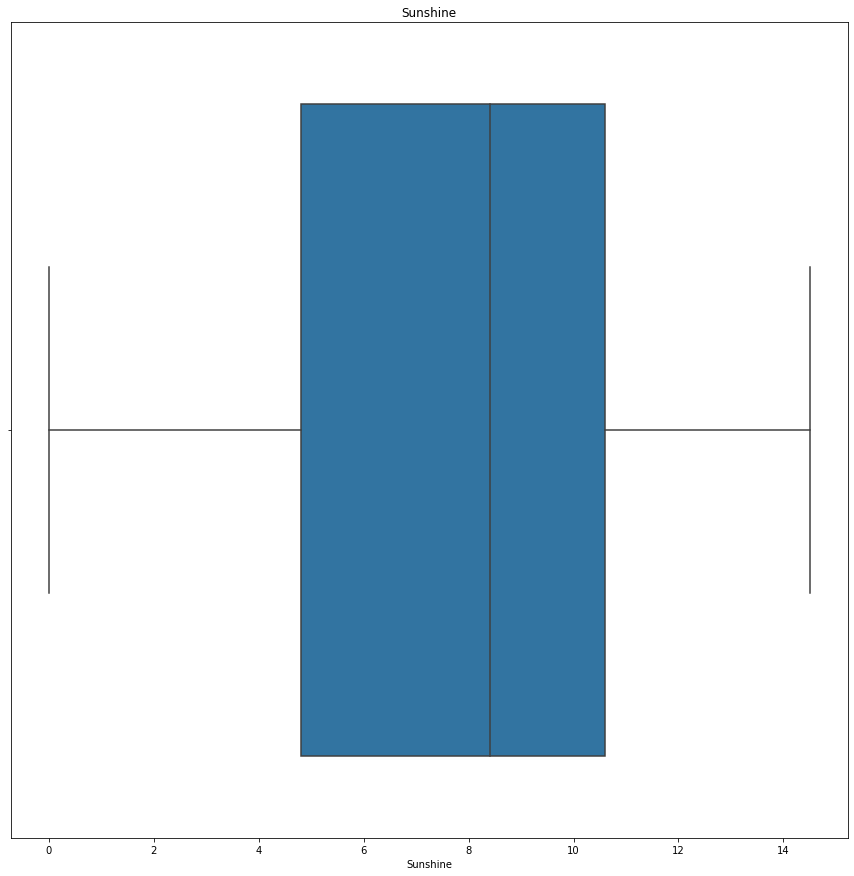

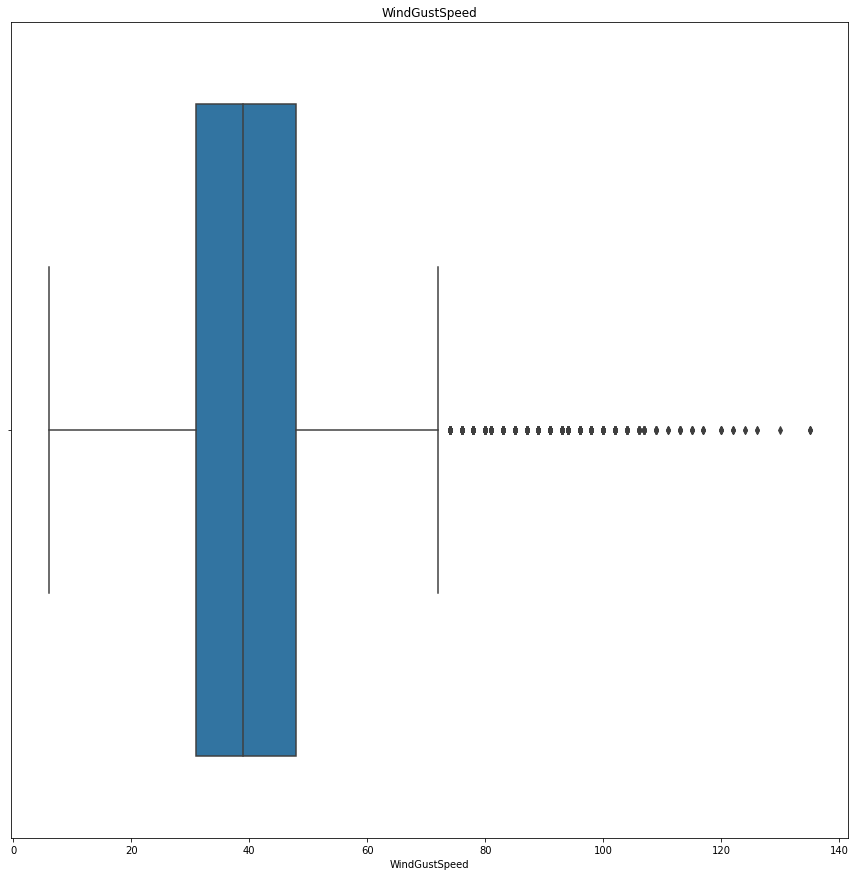

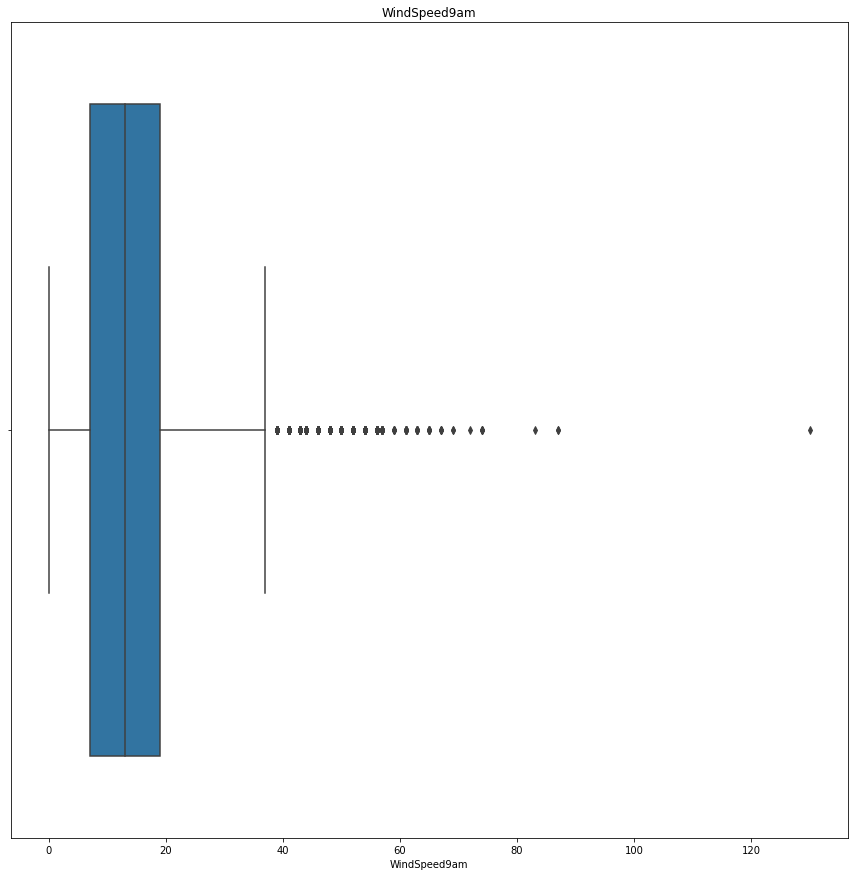

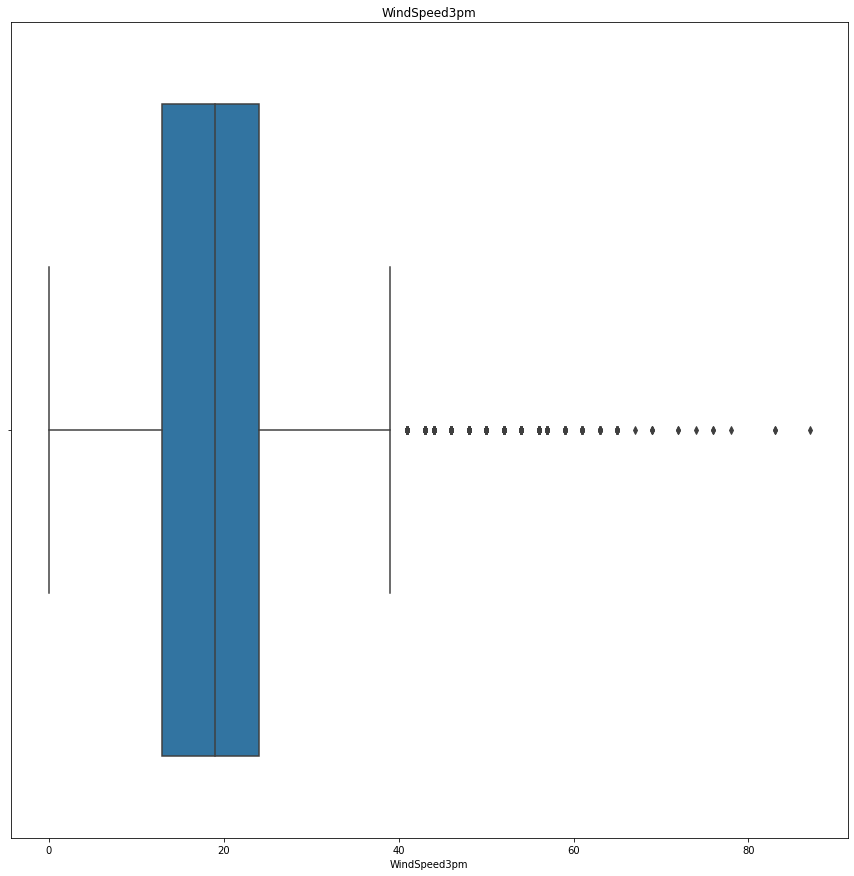

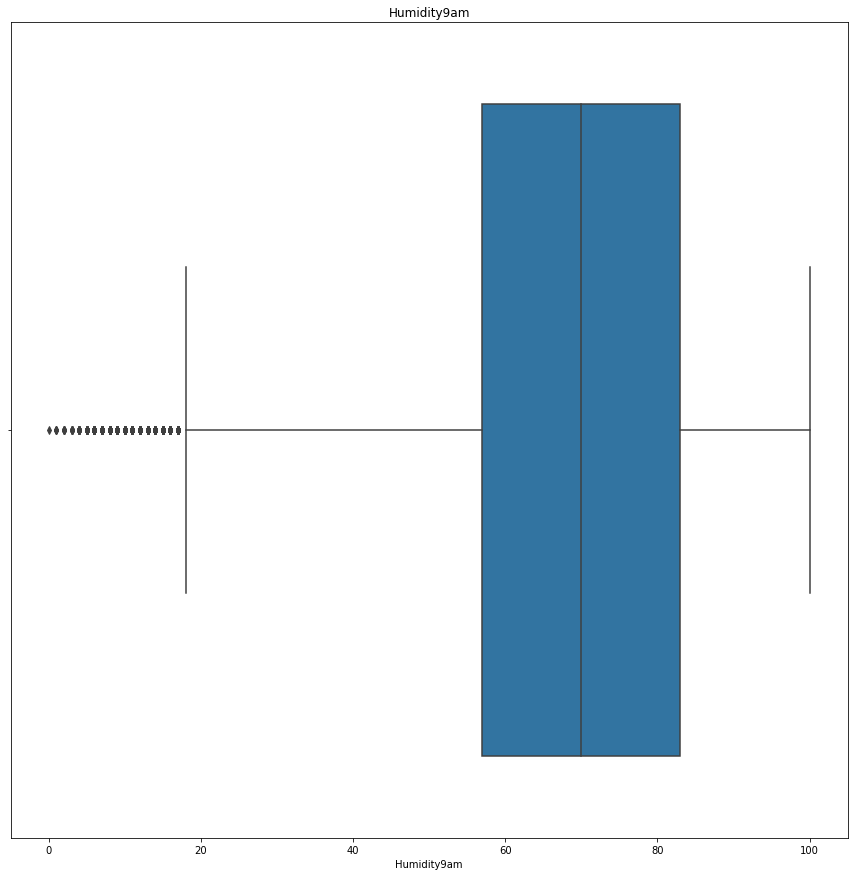

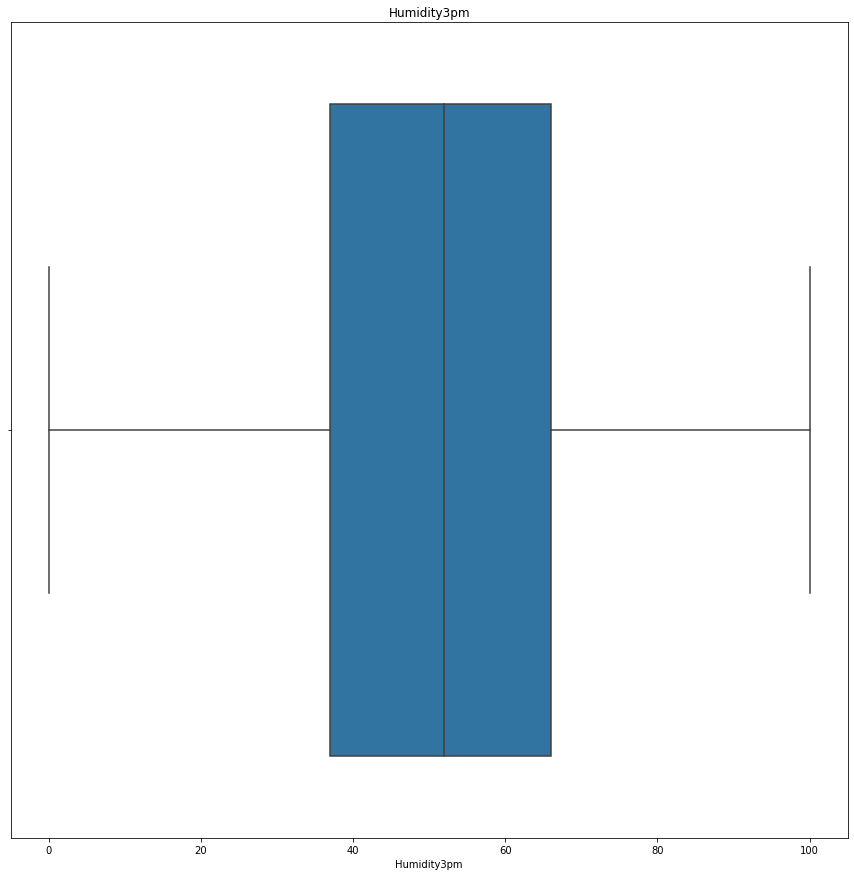

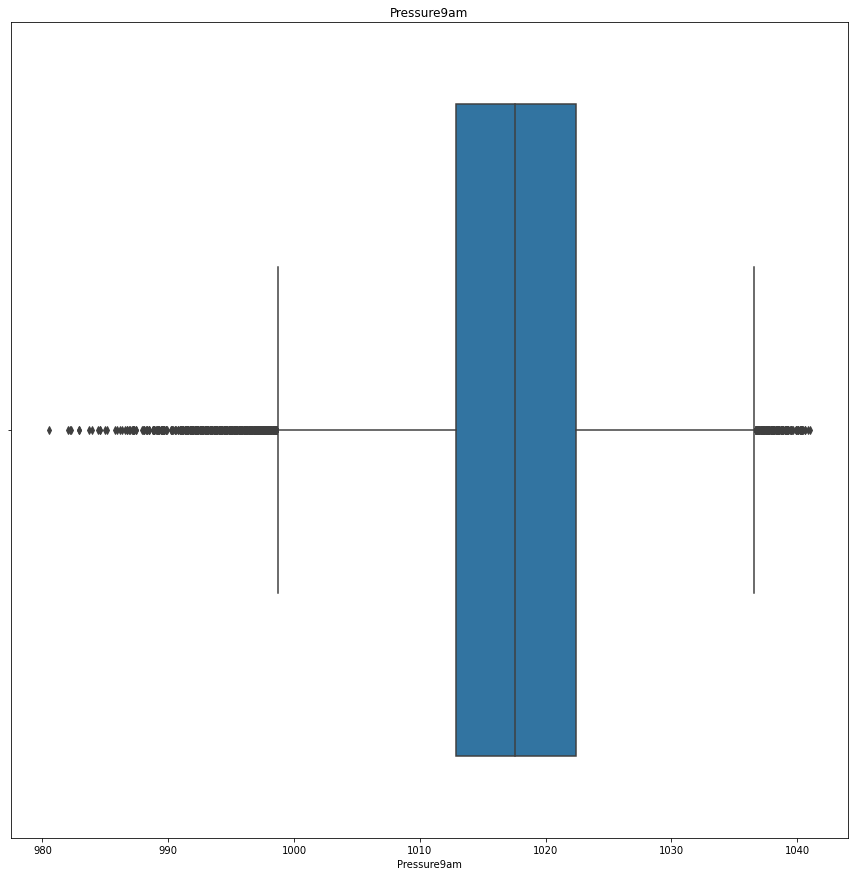

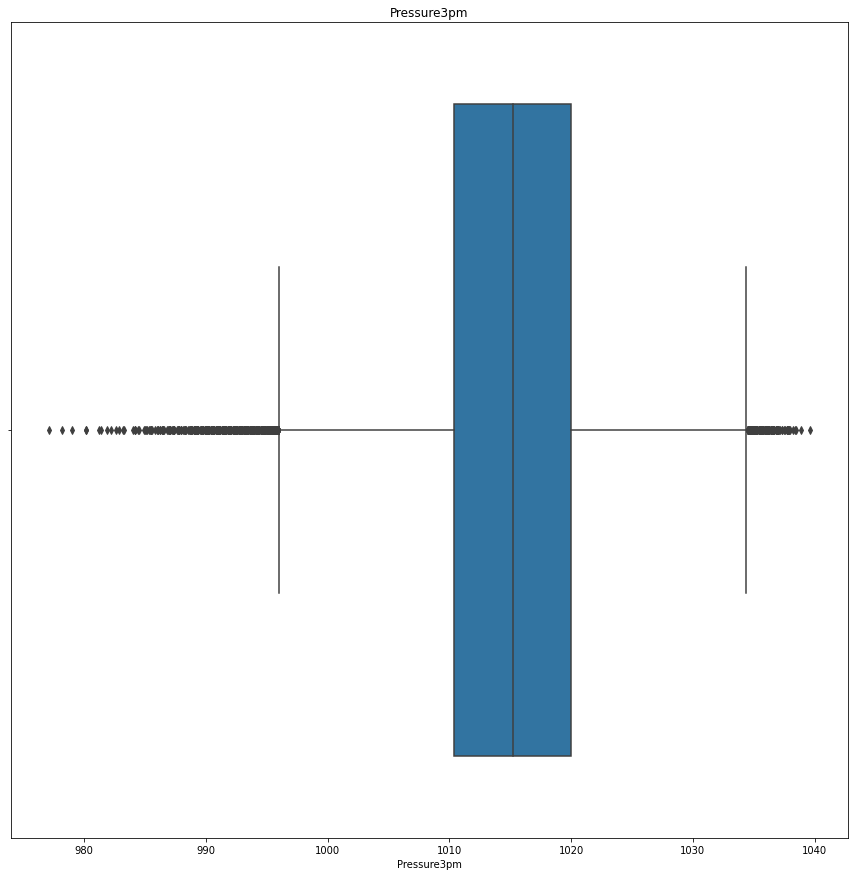

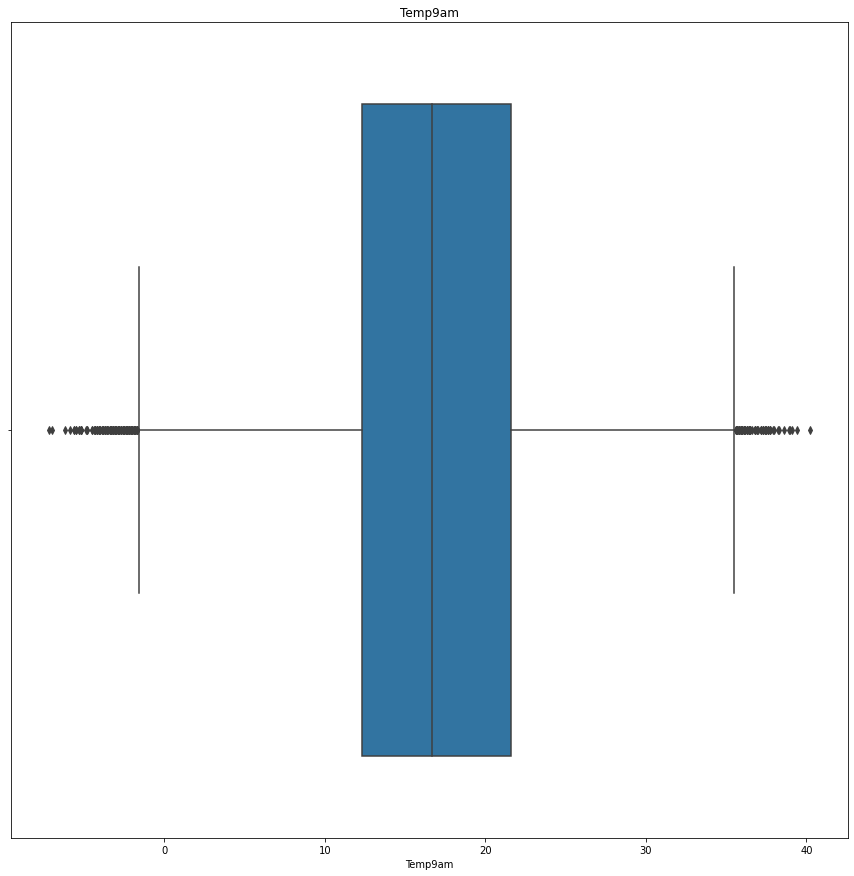

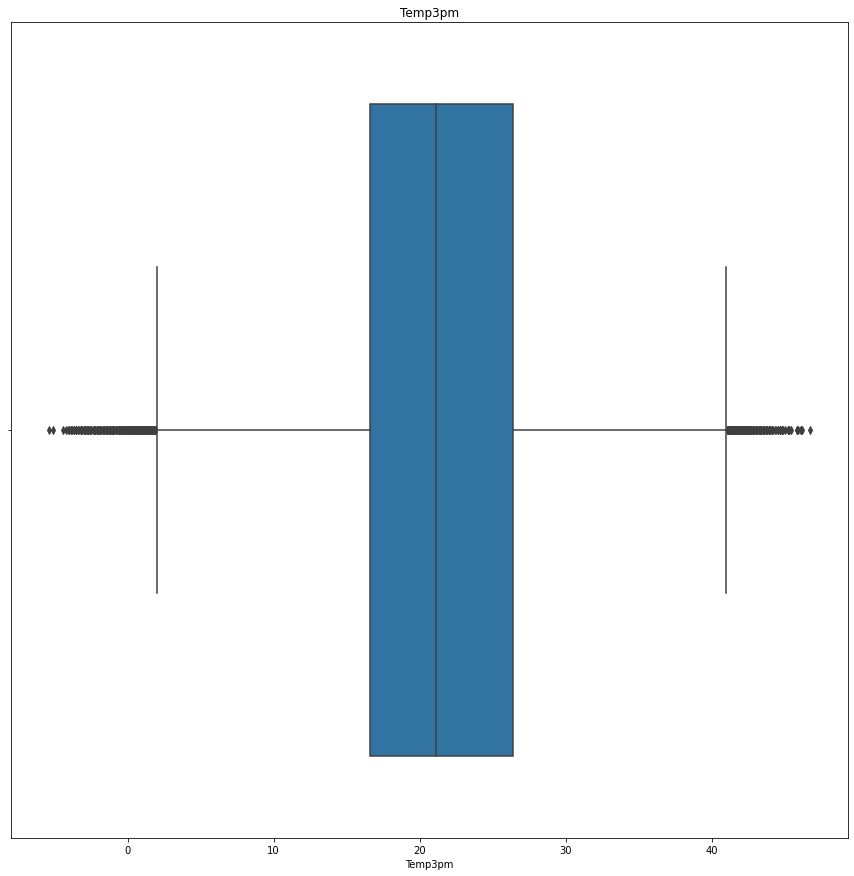

<Figure size 1080x1080 with 0 Axes>

In [14]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# *Outlier Treatment to remove outliers from Numerical Features*

In [15]:
def outliers(df,variable):
  IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
  lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)


  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [16]:
for feature in continuous_feature:
  outliers(df,str(feature))

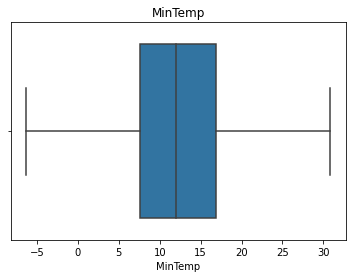

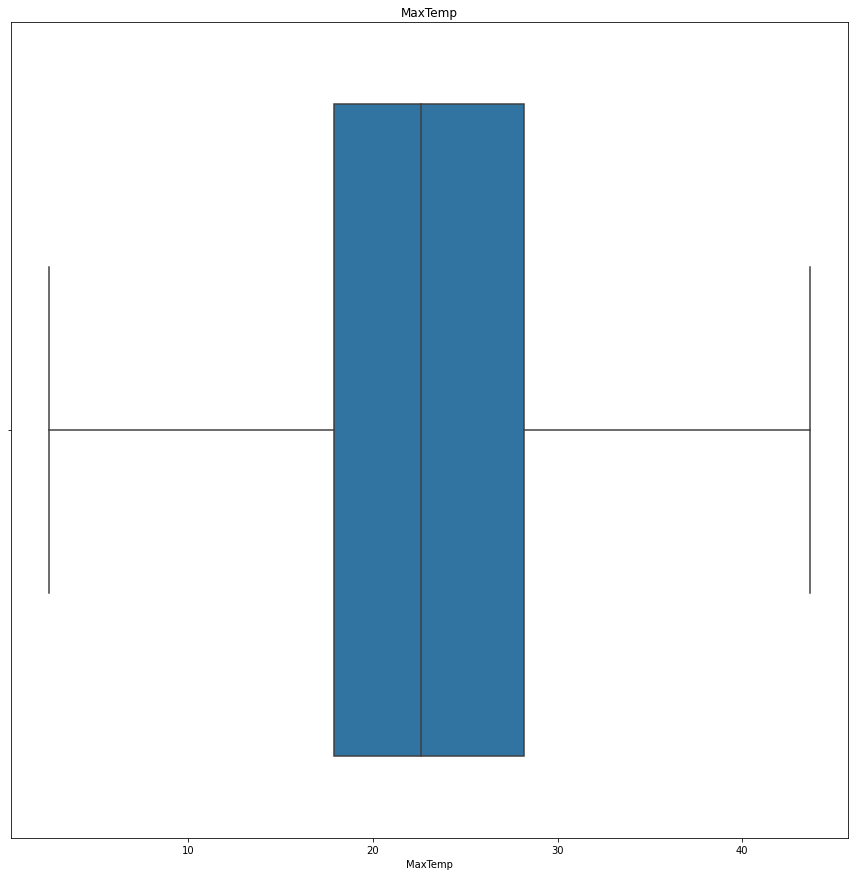

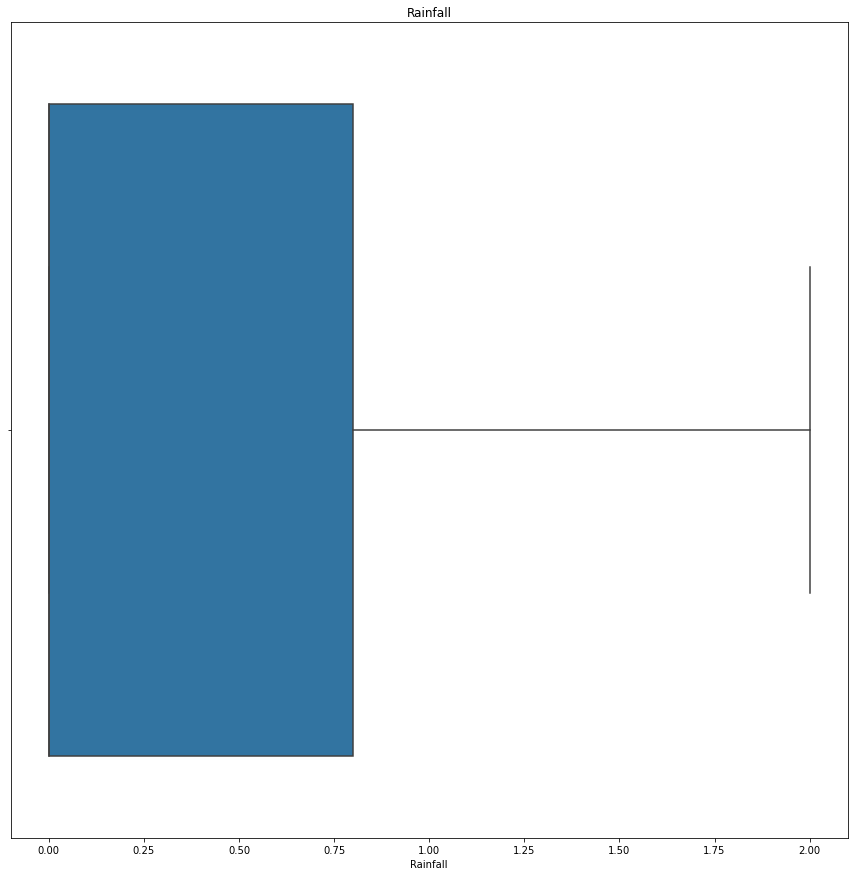

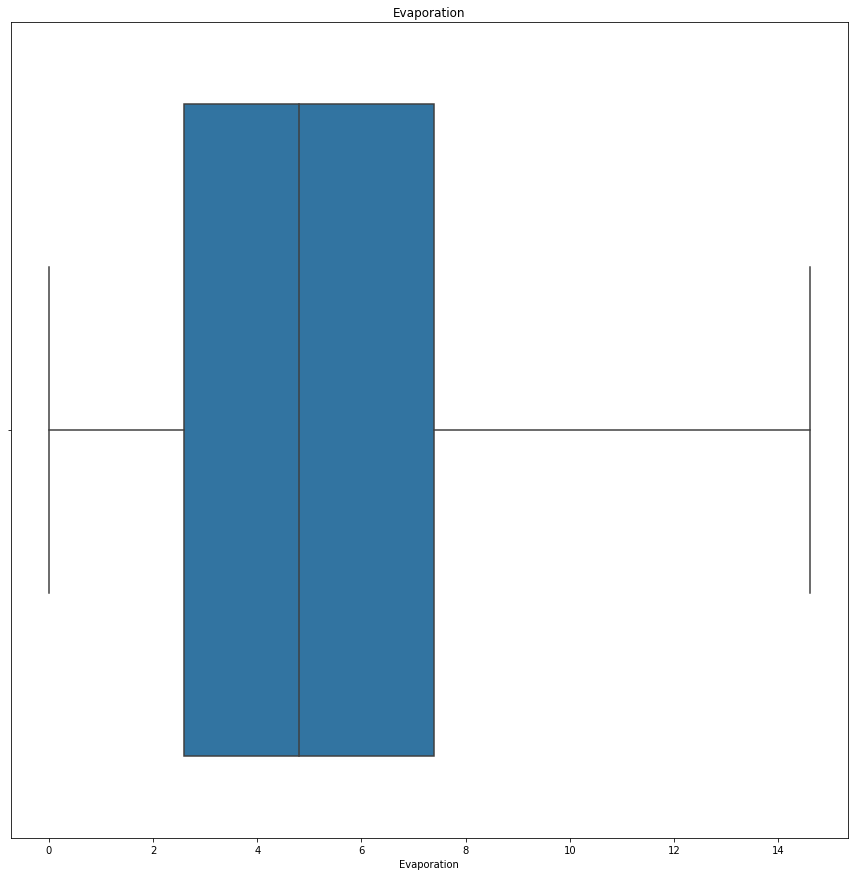

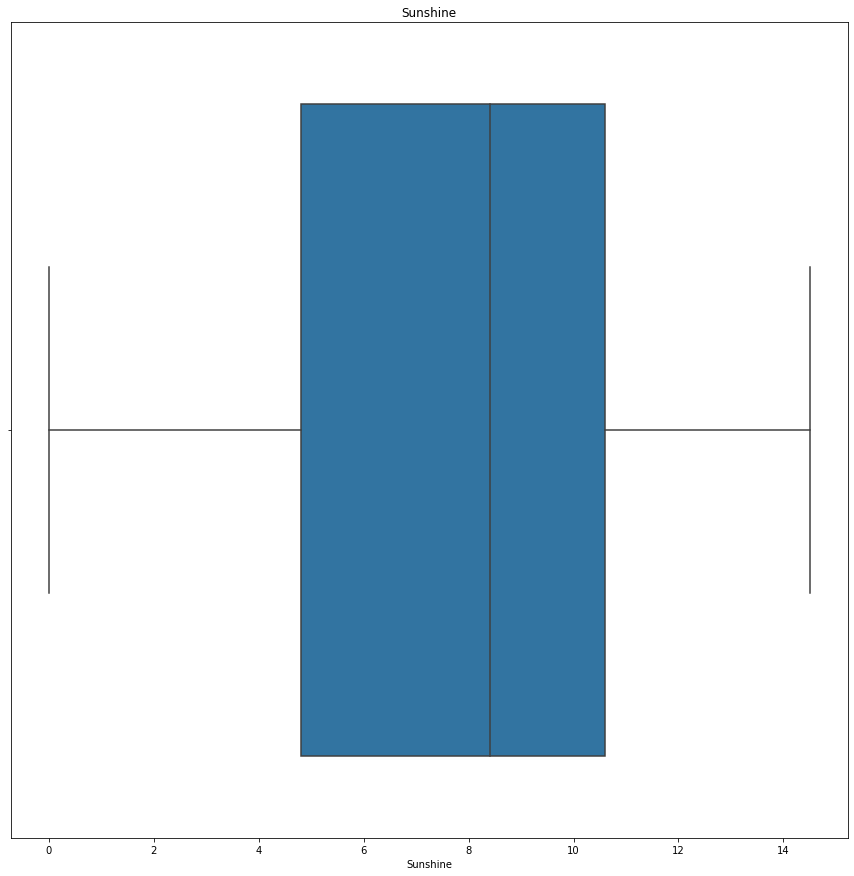

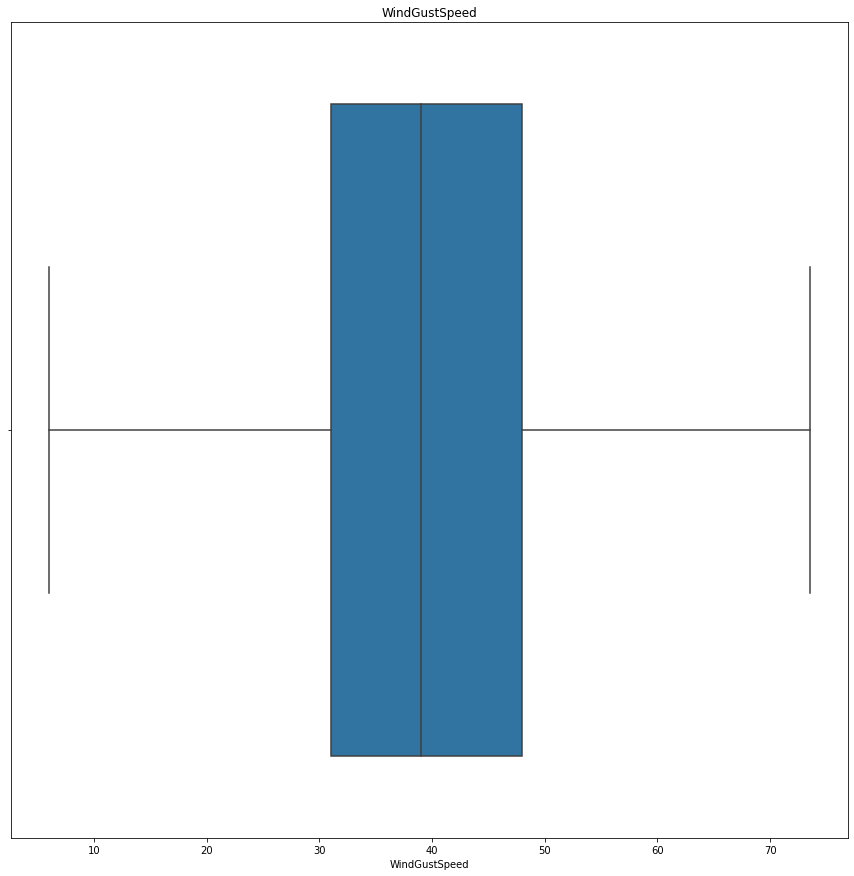

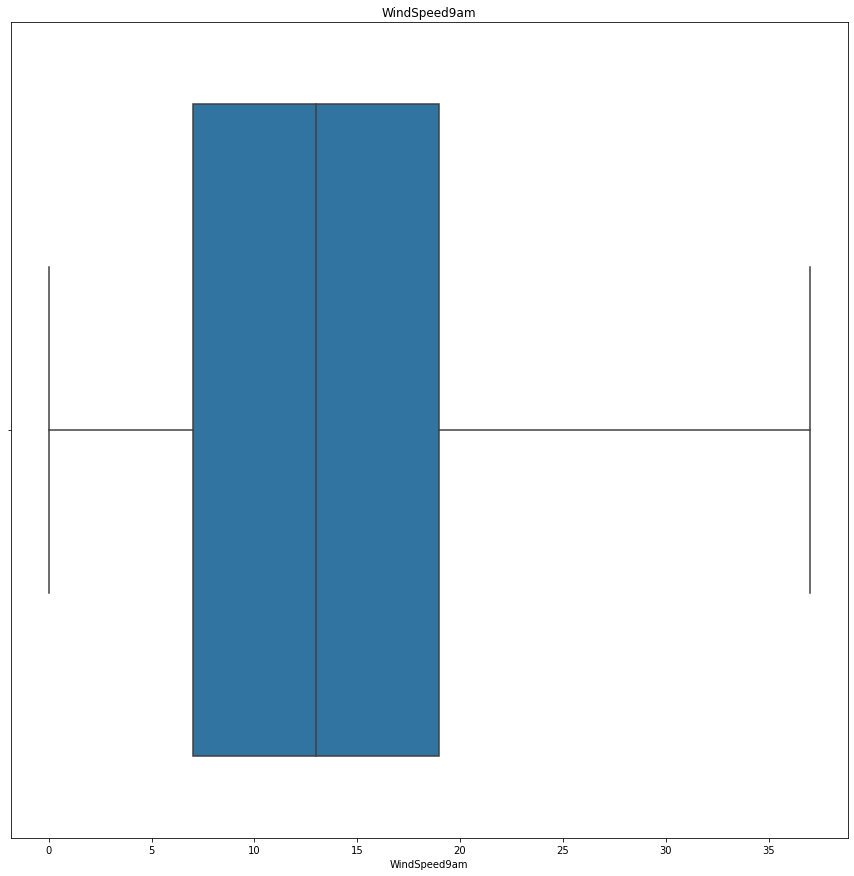

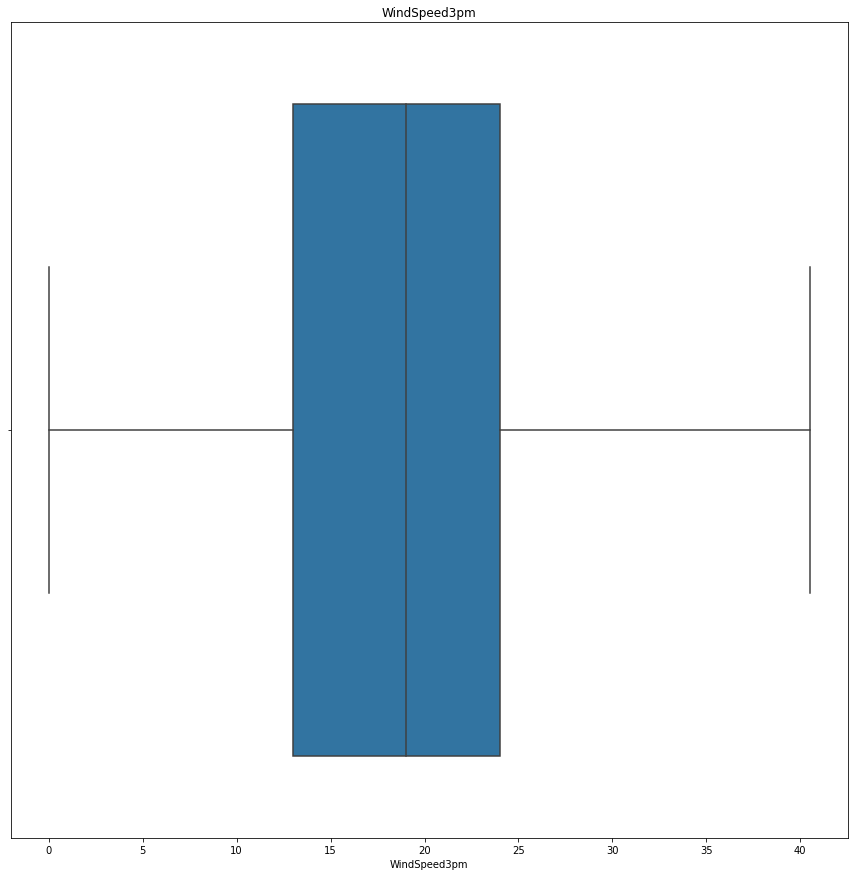

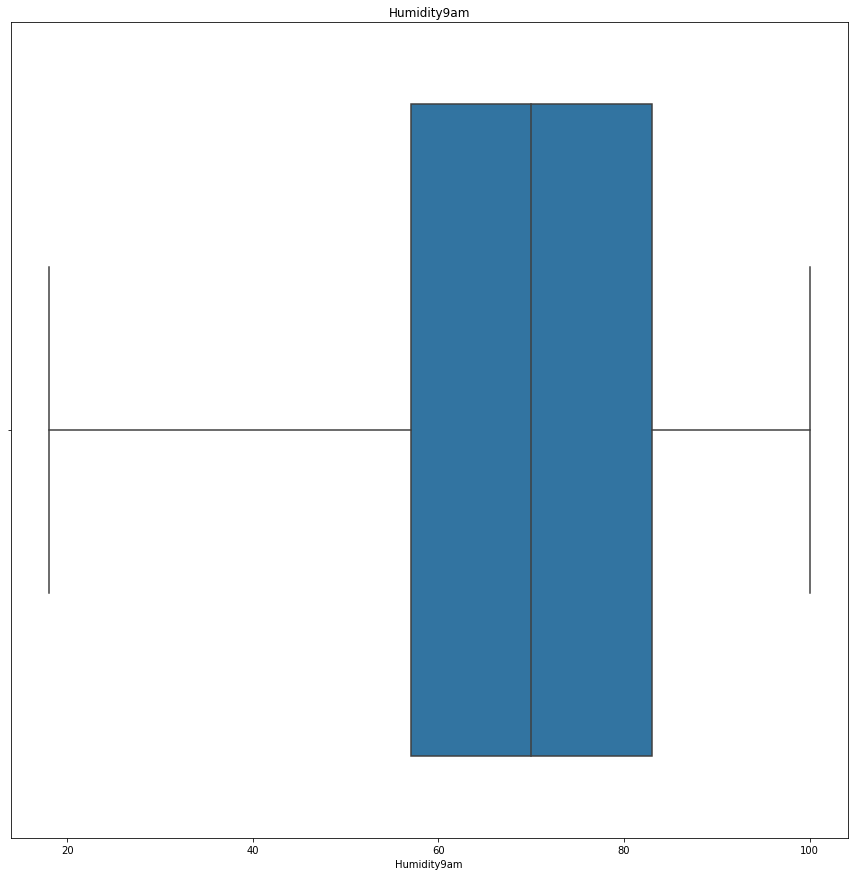

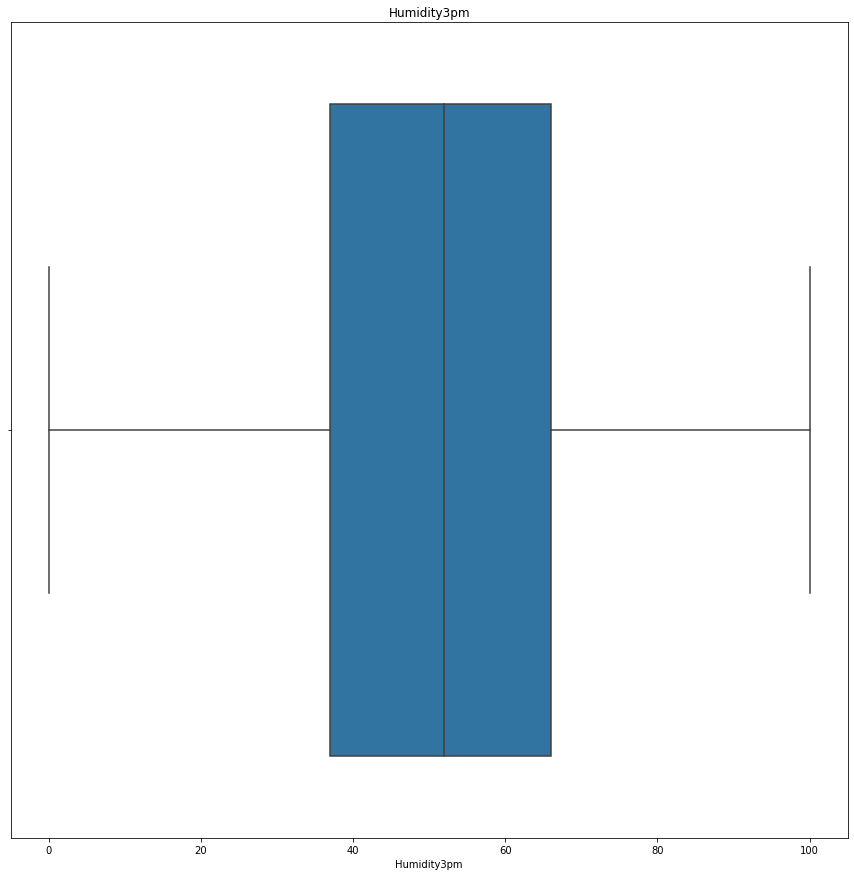

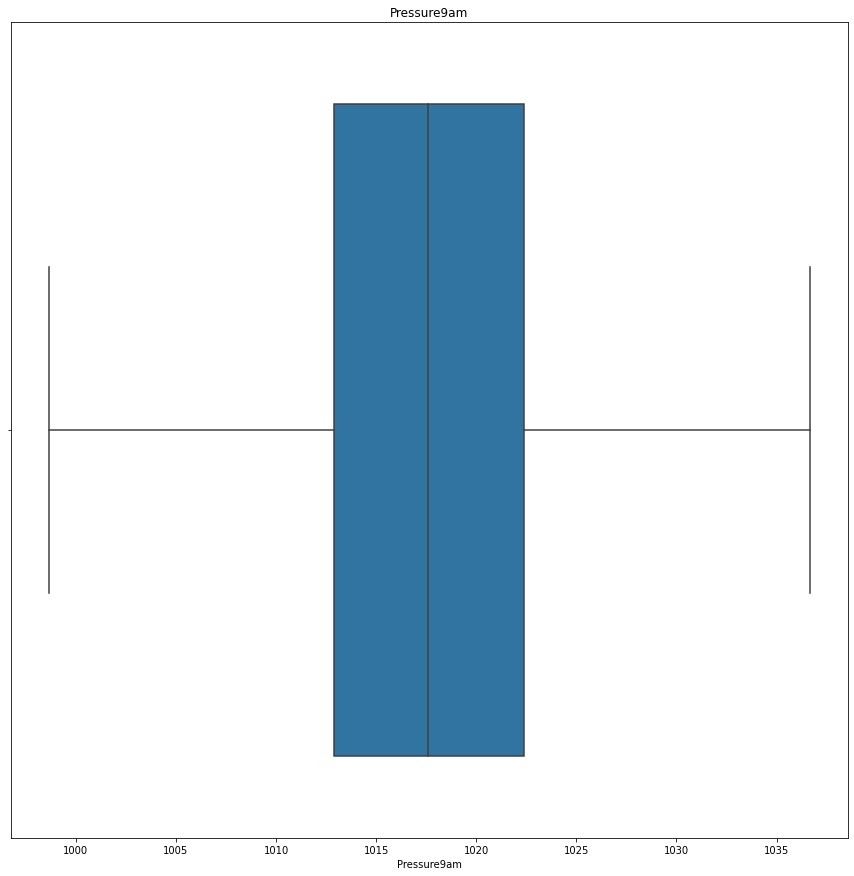

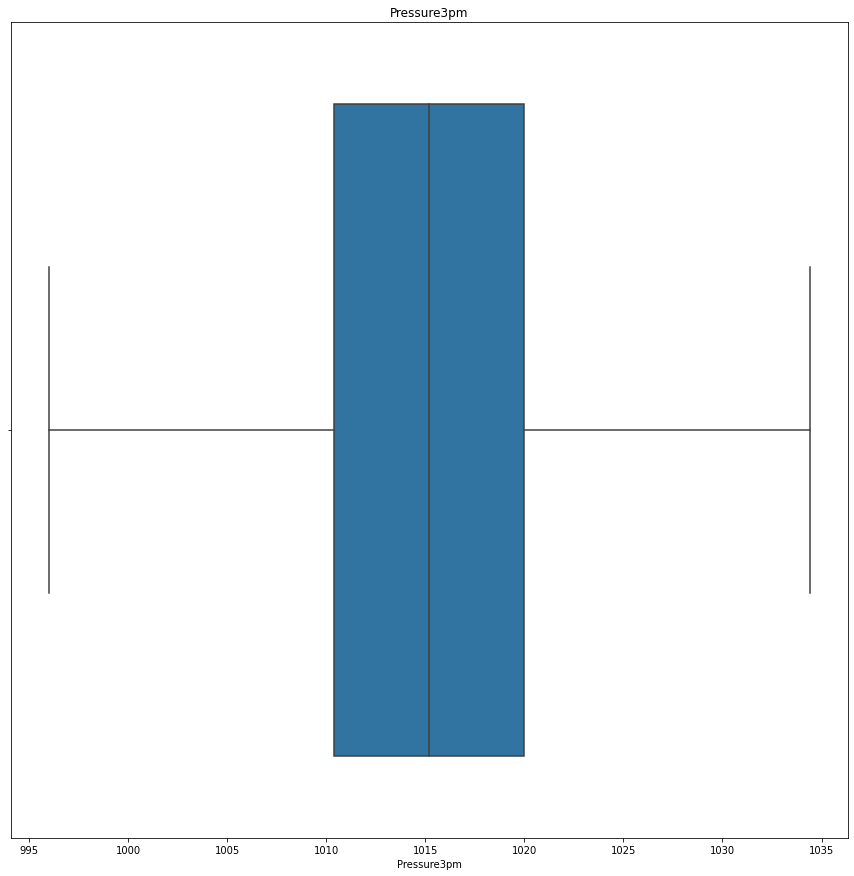

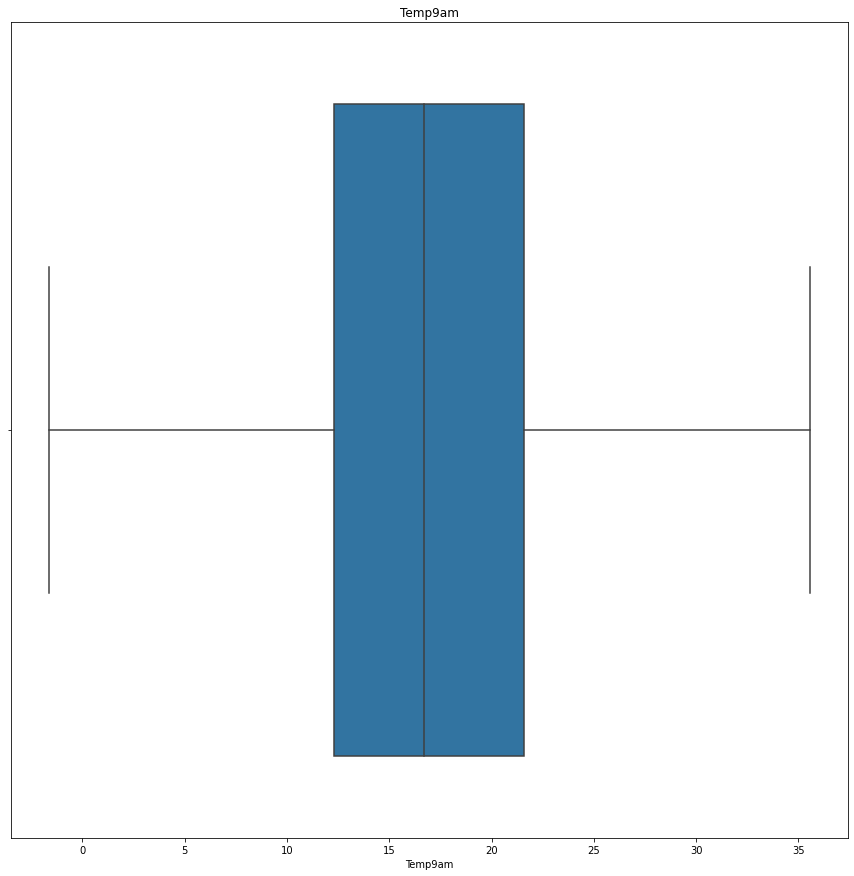

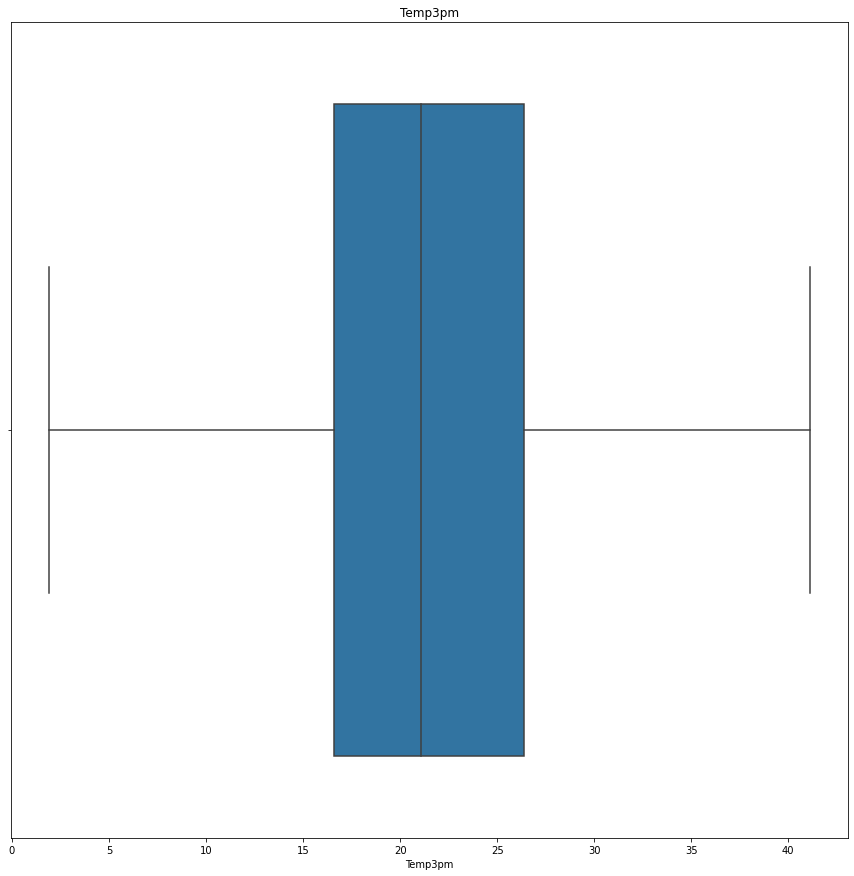

<Figure size 1080x1080 with 0 Axes>

In [17]:
for feature in continuous_feature:
  data=df.copy()
  sns.boxplot(data[feature])
  plt.title(feature)
  plt.figure(figsize=(15,15))

# **Cleaning and Preprocessing Data**

# **Handling Class Imbalance**

In [ ]:
df["RainTomorrow"].value_counts()
sns.countplot(df["RainTomorrow"]).set_title("Percentage of No and Yes in RainTomorrow")


*Looks like Target variable is imbalanced. It has more 'No' values. If data is imbalanced, then it might decrease performance of model.* 

In [ ]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

# **Feature Selection**

- Machine Learning Model performance depends on features that are used to train a model. 
- Feature importance describes which features are relevant to build a model. 
- Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are  at predicting a target variable. Feature importance helps in Feature Selection.

X – Independent Features or Input features

y – Dependent Features or target label

In [3]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [4]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [5]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [6]:
Y.shape

(145460,)

In [7]:
Y=Y.reshape(-1,1)

In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Filling the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

# **Encoding The Categorical Data**

*Most Machine Learning Algorithms can't handle categorical data. Hence, these categorical data needs to converted to numerical data for modelling, which is called as Feature Encoding.*

In [26]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])


#le2 = LabelEncoder()
X[:,4] = le.fit_transform(X[:,4])


#le3 = LabelEncoder()
X[:,6] = le.fit_transform(X[:,6])


#le4 = LabelEncoder()
X[:,7] = le.fit_transform(X[:,7])


#le5 = LabelEncoder()
X[:,-1] = le.fit_transform(X[:,-1])


#le6 = LabelEncoder()
Y[:,-1] = le.fit_transform(Y[:,-1])

In [27]:
X

array([[2, 13.4, 22.9, ..., 16.9, 21.8, 0],
       [2, 7.4, 25.1, ..., 17.2, 24.3, 0],
       [2, 12.9, 25.7, ..., 21.0, 23.2, 0],
       ...,
       [8, 24.8, 31.5, ..., 28.7, 30.3, 0],
       [5, 4.2, 7.9, ..., 4.6, 6.8, 1],
       [34, 19.5, 31.6, ..., 22.5, 31.1, 0]], dtype=object)

In [28]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

# **Feature Scaling**

*Feature Scaling is a technique used to scale, normalize, standardize data in range(0,1). When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. StandardScaler is a class used to implement feature scaling.*

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# **Splitting Dataset into Training set and Testing set**
Dividing the Training-Testing Data as 80:20

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [31]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 176505
Length of Testing Data: 44127


In [32]:
Y_test.shape

(44127, 1)

# **Applying Models**

# **CatBoost**

In [33]:
!pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=0)
cat.fit(X_train, Y_train)

Learning rate set to 0.093821
0:	learn: 0.6550694	total: 99.1ms	remaining: 1m 39s
1:	learn: 0.6246825	total: 140ms	remaining: 1m 9s
2:	learn: 0.6017541	total: 191ms	remaining: 1m 3s
3:	learn: 0.5807868	total: 233ms	remaining: 58s
4:	learn: 0.5638730	total: 272ms	remaining: 54.2s
5:	learn: 0.5504002	total: 315ms	remaining: 52.3s
6:	learn: 0.5394633	total: 357ms	remaining: 50.7s
7:	learn: 0.5301995	total: 410ms	remaining: 50.8s
8:	learn: 0.5227534	total: 454ms	remaining: 49.9s
9:	learn: 0.5161810	total: 496ms	remaining: 49.1s
10:	learn: 0.5103739	total: 543ms	remaining: 48.8s
11:	learn: 0.5055076	total: 586ms	remaining: 48.2s
12:	learn: 0.5011987	total: 634ms	remaining: 48.1s
13:	learn: 0.4971290	total: 677ms	remaining: 47.7s
14:	learn: 0.4936713	total: 718ms	remaining: 47.1s
15:	learn: 0.4907773	total: 760ms	remaining: 46.7s
16:	learn: 0.4879160	total: 804ms	remaining: 46.5s
17:	learn: 0.4852286	total: 851ms	remaining: 46.4s
18:	learn: 0.4830045	total: 896ms	remaining: 46.3s
19:	learn: 

In [34]:
y_pred=cat.predict(X_test)
y_pred.shape


(44127,)

In [35]:
y_pred=y_pred.reshape(44127,1)

In [36]:
df1 = pd.DataFrame(np.concatenate((Y_test, y_pred), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])
df1['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1


,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,No
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,No
44124,No,No
44125,Yes,Yes


In [37]:
accuracy_cat = accuracy_score(Y_test, y_pred)
print(accuracy_cat)
print(classification_report(Y_test,y_pred))


0.8359281165726199
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84     22003
         1.0       0.84      0.84      0.84     22124

    accuracy                           0.84     44127
   macro avg       0.84      0.84      0.84     44127
weighted avg       0.84      0.84      0.84     44127



# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,Y_train)
y_pred1=rf.predict(X_test)

y_pred1.shape


In [ ]:
y_pred1 = y_pred1.reshape((44127, 1))

In [ ]:
df1 = pd.DataFrame(np.concatenate((Y_test, y_pred1), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])
df1['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

df1

In [ ]:
accuracy_rf=accuracy_score(Y_test,y_pred1)
accuracy_rf
y_pred1 = rf.predict(X_test)
print(confusion_matrix(Y_test,y_pred1))
print(accuracy_score(Y_test,y_pred1))
print(classification_report(Y_test,y_pred1))



# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred3 = xgb.predict(X_test)
y_pred3.shape


In [ ]:
y_pred3=y_pred3.reshape((44127,1))
df1 = pd.DataFrame(np.concatenate((Y_test, y_pred3), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])
df1['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

df1

In [ ]:
accuracy_xgb=accuracy_score(Y_test,y_pred3)
accuracy_xgb
print(confusion_matrix(Y_test,y_pred3))
print(accuracy_score(Y_test,y_pred3))
print(classification_report(Y_test,y_pred3))



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred4 = lr.predict(X_test)
y_pred4.shape


In [ ]:
y_pred4=y_pred4.reshape((44127,1))
df1 = pd.DataFrame(np.concatenate((Y_test, y_pred4), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])
df1['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

df1

In [ ]:
accuracy_lr=accuracy_score(Y_test,y_pred4)
accuracy_lr
print(confusion_matrix(Y_test,y_pred4 ))
print(classification_report(Y_test,y_pred4 ))
print(accuracy_score(Y_test, y_pred4))



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred5=dt.predict(X_test)
y_pred5.shape


In [ ]:
y_pred5=y_pred5.reshape((44127,1))
df1 = pd.DataFrame(np.concatenate((Y_test, y_pred5), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])
df1['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

df1

In [ ]:
accuracy_dt=accuracy_score(Y_test,y_pred5)
accuracy_dt
print(confusion_matrix(Y_test,y_pred5 ))
print(classification_report(Y_test,y_pred5 ))
print(accuracy_score(Y_test,y_pred5 ))


# **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(100, input_shape = (19,1)))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 1)
y_pre=regressor.predict(X_test)

print(len(y_pre))
print(len(Y_test))

In [ ]:
type(y_pre)

In [ ]:
y_pre.shape

In [ ]:
y_pre = list(map(lambda x: 0 if x<0.5 else 1, y_pre))
y_pre=np.array(y_pre)
y_pre=y_pre.reshape(44127,1)
y_pre.shape

In [ ]:
df1 = pd.DataFrame(np.concatenate((Y_test, y_pre), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])
df1

In [ ]:
df1['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
df1['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

df1



In [ ]:
accuracy_lstm=accuracy_score(Y_test,y_pre)
accuracy_lstm
#epochs=40==>87%

In [ ]:
print(confusion_matrix(Y_test,y_pre ))
print(classification_report(Y_test,y_pre ))
print(accuracy_score(Y_test,y_pre ))


# **Comparing Models**

In [ ]:
#!pip install pycaret

In [ ]:
#from pycaret.classification import *


In [ ]:
#X_train = pd.DataFrame(X_train)
             
#s=setup(df,target='RainTomorrow')

In [ ]:
#All=compare_models()